**Author: Alexander Kollmann, 08/2022**

---



**Funktion**

CSV-Datei lesen

Pandas nutzen

Plot

---



**Referenzen**

https://covid19-dashboard.ages.at/data/Hospitalisierung.csv

---


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
#url = 'https://www.salzburg.gv.at/ogd/bad388c1-e13f-484d-ba51-331a79537f5f/meteorologie-aktuell.csv'
url = 'https://covid19-dashboard.ages.at/data/Hospitalisierung.csv'


df = pd.read_csv(url, encoding='utf-8', sep=";", decimal=",")
df['Meldedatum'] = pd.to_datetime(df['Meldedatum'], format='%d.%m.%Y  %H:%M:%S')
df['Wochentag'] = df['Meldedatum'].dt.day_name()
df['Wochentag_Index'] = df['Meldedatum'].dt.dayofweek


#df_plot = df
#df_plot = df.query('Bundesland == "Salzburg" or Bundesland == "Tirol"')
df_plot = df.query('Bundesland != "Österreich"')

df_plot



,Meldedatum,BundeslandID,Bundesland,NormalBettenBelCovid19,IntensivBettenKapGes,IntensivBettenBelCovid19,IntensivBettenBelNichtCovid19,IntensivBettenFrei,TestGesamt,Wochentag,Wochentag_Index
0,2021-01-24,1,Burgenland,38,52,7,37,8,361192,Sunday,6
1,2021-01-24,2,Kärnten,72,168,9,123,36,429539,Sunday,6
2,2021-01-24,3,Niederösterreich,359,337,53,163,121,2111482,Sunday,6
3,2021-01-24,4,Oberösterreich,240,250,38,125,87,1184481,Sunday,6
4,2021-01-24,5,Salzburg,97,137,22,80,35,471712,Sunday,6
...,...,...,...,...,...,...,...,...,...,...,...
5914,2022-09-07,5,Salzburg,73,132,0,93,39,10839632,Wednesday,2
5915,2022-09-07,6,Steiermark,108,328,4,207,117,21653682,Wednesday,2
5916,2022-09-07,7,Tirol,52,161,3,130,28,9760324,Wednesday,2
5917,2022-09-07,8,Vorarlberg,17,52,2,25,25,7170713,Wednesday,2


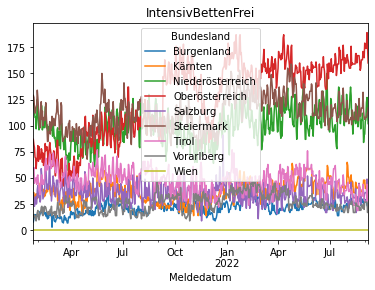

In [85]:
#param = "TestGesamt"
param = "IntensivBettenFrei"
df_plot.set_index('Meldedatum')
df_pivot = df_plot.pivot(index="Meldedatum", columns="Bundesland", values=param)
df_pivot.plot(title=param);

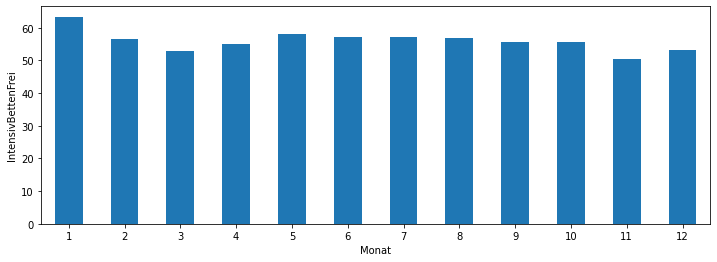

In [86]:
fig, axs = plt.subplots(figsize=(12, 4))

df_plot.groupby(df_plot["Meldedatum"].dt.month)[param].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Monat");  # custom x label using Matplotlib
plt.ylabel(param);

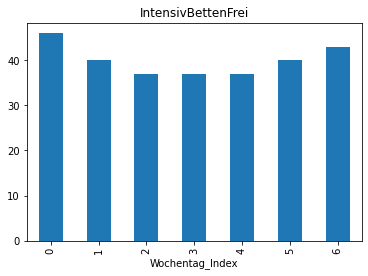

In [82]:
df_plot[['Wochentag_Index', param, 'Wochentag']].groupby('Wochentag_Index').median().plot(kind='bar', legend=None, title = param)